# Линейная регрессия
__Суммарное количество баллов: 10__


In [355]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
import scipy
import pandas as pd

In [356]:
def read_data(path="./hw8_data/boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [357]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Ее и нужно реализовать.

In [358]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [359]:
class NormalLR:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.X = X
        b = np.ones((1, len(X)))
        X_b = np.concatenate((X, b.T), axis=1)
        self.X_b = X_b
        self.y = y
        self.w = scipy.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  
        
    def predict(self, X):
        b = np.ones((1, len(X)))
        X_b = np.concatenate((X, b.T), axis=1)
        return X_b @ self.w

In [360]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [361]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.009734099487347903


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

### Задание 4 (2 балла)
Добавьте в метод `fit` регуляризацию Лассо с коэффициентом `l`. Постройте график зависимости ошибки предсказания данных из синтетического набора данных от коэффициента регуляризации.

In [400]:
class GradientLR:
    def __init__(self, alpha, iterations=10000, l=0.):
        self.alpha = alpha
        self.iterations = iterations
        self.l = l
    
    def fit(self, X, y):
        b = np.ones((1, len(X)))
        X_b = np.concatenate((X, b.T), axis=1) 
        w = np.zeros(X_b.shape[1])
        len_X = len(X)
        for i in range(self.iterations):
            # print('fff')
            # wf = 2 + 2
            g = X_b.T @ (X_b @ w - y) * 2 / len_X
            w -= self.alpha * (g + self.l * np.sign(w))
        self.w = w
        

    def predict(self, X):
        b = np.ones((1, len(X)))
        X_b = np.concatenate((X, b.T), axis=1)
        return X_b @ self.w

In [401]:
def build_plot(X_train, y_train, X_test, y_test, iteration = 1000, start = 0, stop = 0.008, step = 0.0001, alpha = 0.1 ):
    error = []
    for i in np.arange(start, stop, step):
        regr = GradientLR(alpha , iterations=iteration, l=i)
        regr.fit(X_train, y_train)
        error.append(mse(y_test, regr.predict(X_test)))
    
    fig = plt.figure()
    plt.plot(np.arange(start, stop, step), error)
    plt.grid()
    plt.xlabel('коэффициент регуляризации')
    plt.ylabel('ошибка предсказаня измеренная MSE')
    plt.show()

In [376]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

0.009812311156304761


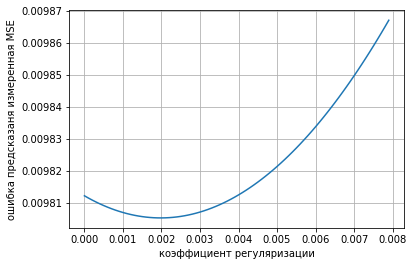

In [377]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

### Задание 5 (2 балла)
Протесируйте оба метода на данных cancer и spam, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

Данный метод крайне чувствителен к ненормированным данным. (Я это понял так как ничего не сходилось). Поэтому принимаю решение стандартизировать все данные. 

### Boston

In [413]:
X, y = read_data(path="./hw8_data/boston.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [414]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

stand_1 = preprocessing.StandardScaler()
stand_1.fit(X_train)
X_train = stand_1.transform(X_train)
X_test = stand_1.transform(X_test)

In [415]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

32799862.680207618


31064561.45878608


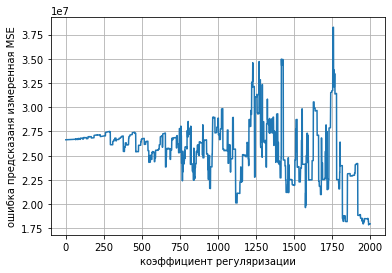

In [392]:
regr = GradientLR(0.01, iterations=1000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test, iteration = 30, start = 0, stop = 2000, step = 1)

In [430]:
regr = GradientLR(10**(-10), iterations=10**(6))
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

283797614.7922891


Отметим, что значение функции потерь в обоих методах примерно одиаковы, однако значения огромны! Если даже начать искать существенно аккуратнее с помощью градиентного метода, то мы получим ответ незначительно лучше. 

In [393]:
def read_cancer_dataset(path="./hw8_data/cancer.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=1)
    X = dataframe[:, 1:]
    y = dataframe[:, 0]
    df = pd.read_csv(path, sep=",",  header = 0, decimal ='.')
    y = df['label']
    y = y.replace({'B':0, 'M':1})
    # print(np.array(y))
    return X, np.array(y)


def read_spam_dataset(path="./hw8_data/spam.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=1)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

### Cancer

In [394]:
X, y = read_cancer_dataset("./hw8_data/cancer.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [395]:
stand_1 = preprocessing.StandardScaler()
stand_1.fit(X_train)
X_train = stand_1.transform(X_train)
X_test = stand_1.transform(X_test)

In [396]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.059868759834403665


0.06154152280602845


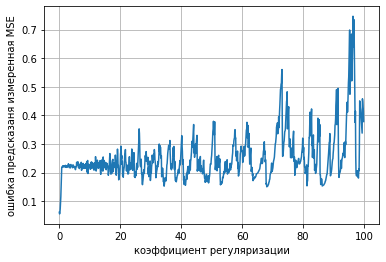

In [403]:
regr = GradientLR(0.001, iterations=1000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test, iteration = 1000, start = 0, stop = 100, step = 0.1, alpha = 0.001)

Методы имеют одинаковую ошибку, коэффициент регуляризации ухудшает ситуацию

### Spam

In [407]:
X, y = read_spam_dataset("./hw8_data/spam.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [408]:
stand_1 = preprocessing.StandardScaler()
stand_1.fit(X_train)
X_train = stand_1.transform(X_train)
X_test = stand_1.transform(X_test)

In [409]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.1899640438920716


0.1448132840055484


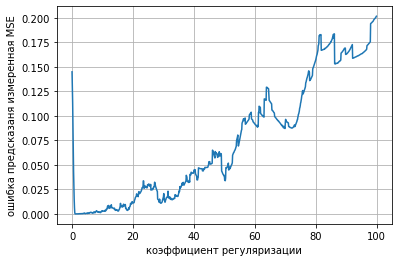

In [410]:
regr = GradientLR(0.001, iterations=1000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test, iteration = 1000, start = 0, stop = 100, step = 0.1, alpha = 0.001)

Оценим ошибку при коэффициенте регуляризации равным 1. 

In [412]:
regr = GradientLR(0.0001, iterations=10000, l = 1)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

4.652452773767568e-07


Ошибка мала, что не может не радовать. При коэффициенте регуляризации равном 1 ошибка меньше $10^{-6}$